In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from datetime import datetime
import logging

In [2]:
formatter = logging.Formatter('%(asctime)s :: %(name)s :: %(funcName)s :: %(lineno)d - %(message)s', datefmt='%d-%b-%y %H:%M:%s')
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
file_handler = logging.FileHandler('simulation.log')
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [3]:
class Ising():
    def metropolis(self, randm_init_lattice, N, beta):
        for k in range(N):
            for l in range(N):
                a = np.random.randint(0, N)               
                b = np.random.randint(0, N)
                s = randm_init_lattice[a,b]
                neighbours = randm_init_lattice[(a+1)%N, b] + randm_init_lattice[a,(b+1)%N] + randm_init_lattice[(a-1)%N, b] + randm_init_lattice[a,(b-1)%N]
                dE=2*neighbours*s           
                if dE<=0:                   
                    s=-1.0*s
                elif rand() < np.exp(-dE*beta):    
                    s=-1.0*s
                randm_init_lattice[a,b]=s    
        return randm_init_lattice
    
    def simulation(self): 
        N = 64
        temperature= 2.6
        logger.info('dimension of the square lattice is {}x{}'.format(N, N))
        logger.info('Temperature {} J/kb'.format(temperature)) 
        randm_init_lattice = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80)    
        self.configurationplot(f, randm_init_lattice, 0, N, 1)
        
        for i in range(1001):
            self.metropolis(randm_init_lattice, N, 1.0/temperature)
            if i == 1:       
                self.configurationplot(f, randm_init_lattice, i, N, 2)
            if i == 4:       
                self.configurationplot(f, randm_init_lattice, i, N, 3)
            if i == 32:      
                self.configurationplot(f, randm_init_lattice, i, N, 4)
            if i == 100:     
                self.configurationplot(f, randm_init_lattice, i, N, 5)
            if i == 1000:    
                self.configurationplot(f, randm_init_lattice, i, N, 6)
                
    def configurationplot(self, f, randm_init_lattice, i, N, n):
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n)  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, randm_init_lattice, cmap=plt.cm.RdBu)
        plt.title('Time=%d'%i) 
        plt.axis('tight')        
    plt.show()

In [4]:
rm = Ising()

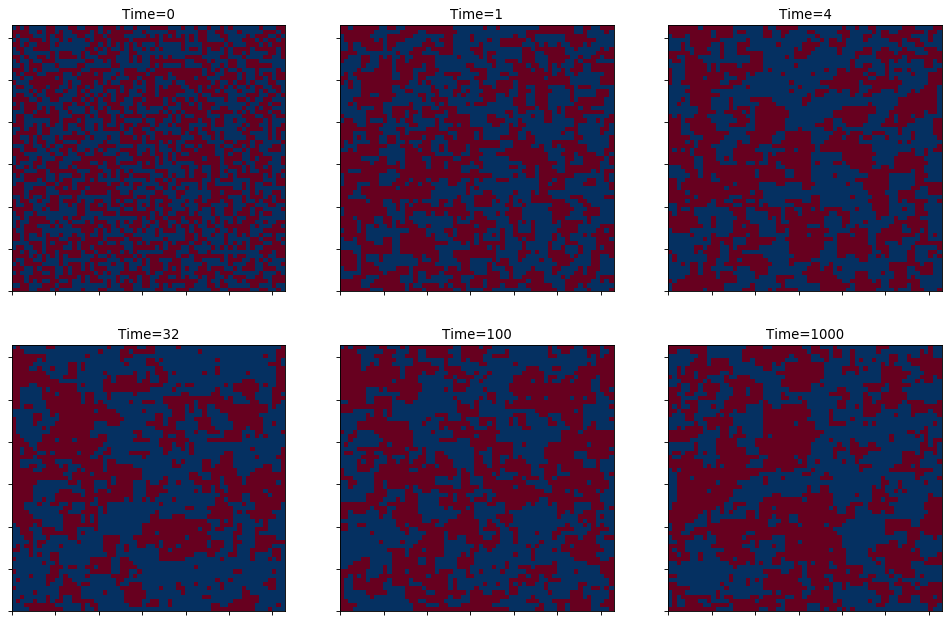

In [5]:
start_time = datetime.now()
logger.info('simulation started at {}'. format(start_time))
rm.simulation()
end_time = datetime.now()
logger.info('Duration: {}'.format(end_time - start_time))
logger.info('Program ended \n---------------------------------------------------------------------------------------------------------------------------------------')